<h1><center> AGE OF MARRIAGE </center></h1>

### Import Required LIabraries

In [315]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score


import matplotlib.pyplot as plt
#matplotlib inline
import seaborn as sns

import pickle

### Import Dataset

In [261]:
df = pd.read_csv('marriage.csv')
df.head()

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0


### Exploratory Data Analysis (EDA)

In [262]:
print('The shape of data set : ',df.shape)

The shape of data set :  (2567, 10)


In [263]:
print('The existing features names : ',[col for col in df.columns])

The existing features names :  ['id', 'gender', 'height', 'religion', 'caste', 'mother_tongue', 'profession', 'location', 'country', 'age_of_marriage']


In [264]:
print('The total number of null values present in data','\n', df.isnull().sum())

The total number of null values present in data 
 id                   0
gender              29
height             118
religion           635
caste              142
mother_tongue      164
profession         330
location           155
country             16
age_of_marriage     19
dtype: int64


In [265]:
print('The % of null values present in each data columns :')
for col in df.columns:
    print(col, ':', round(df[col].isnull().sum()/df.shape[0]*100,2))

The % of null values present in each data columns :
id : 0.0
gender : 1.13
height : 4.6
religion : 24.74
caste : 5.53
mother_tongue : 6.39
profession : 12.86
location : 6.04
country : 0.62
age_of_marriage : 0.74


**'Religion'** coplumn is having about 25% of null values. It's a huge. Let's delete those rows.

In [266]:
df=df.dropna(subset=['religion'])
for col in df.columns:
    print(col, ':', round(df[col].isnull().sum()/df.shape[0]*100,2))

id : 0.0
gender : 0.0
height : 0.0
religion : 0.0
caste : 0.0
mother_tongue : 0.0
profession : 0.0
location : 0.0
country : 0.0
age_of_marriage : 0.0


We could see that all the rows with null values are gone.

In [267]:
df.reset_index(drop=True,inplace=True)

In [268]:
print('A brief information for our dataset :','\n')
print(df.info())

A brief information for our dataset : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1932 non-null   int64  
 1   gender           1932 non-null   object 
 2   height           1932 non-null   object 
 3   religion         1932 non-null   object 
 4   caste            1932 non-null   object 
 5   mother_tongue    1932 non-null   object 
 6   profession       1932 non-null   object 
 7   location         1932 non-null   object 
 8   country          1932 non-null   object 
 9   age_of_marriage  1932 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 151.1+ KB
None


In [269]:
print('Find the correlations')
df.corr()

Find the correlations


,id,age_of_marriage
id,1.00000,0.00682
age_of_marriage,0.00682,1.00000


### Feature Engineering and Data visualization

The Male and Female ratio


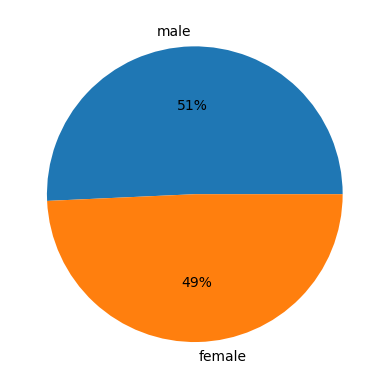

In [270]:
print('The Male and Female ratio')
plt.pie(df['gender'].value_counts(),labels = df['gender'].unique(), autopct='%.0f%%')
plt.show()

The variety of caste


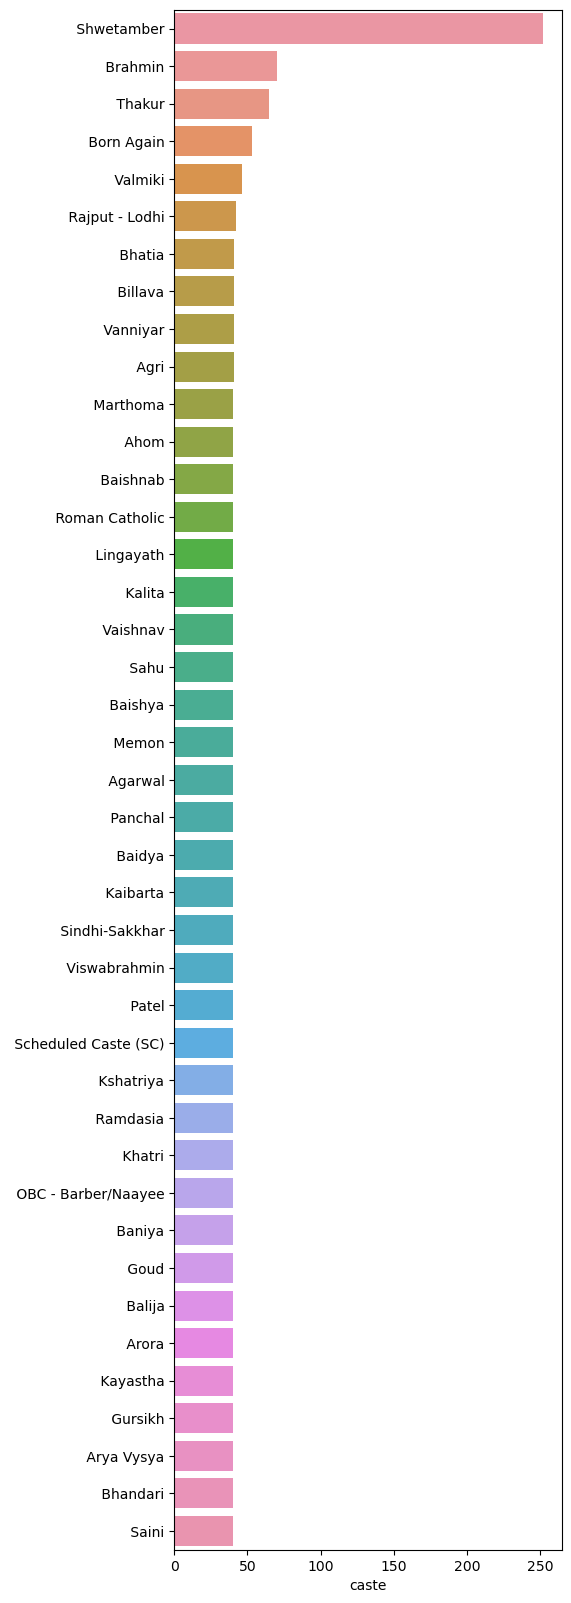

In [271]:
print('The variety of caste')
plt.figure(figsize=(5,20))
sns.barplot(x=df['caste'].value_counts(),y=df['caste'].unique())
plt.show()

The variety of Religion


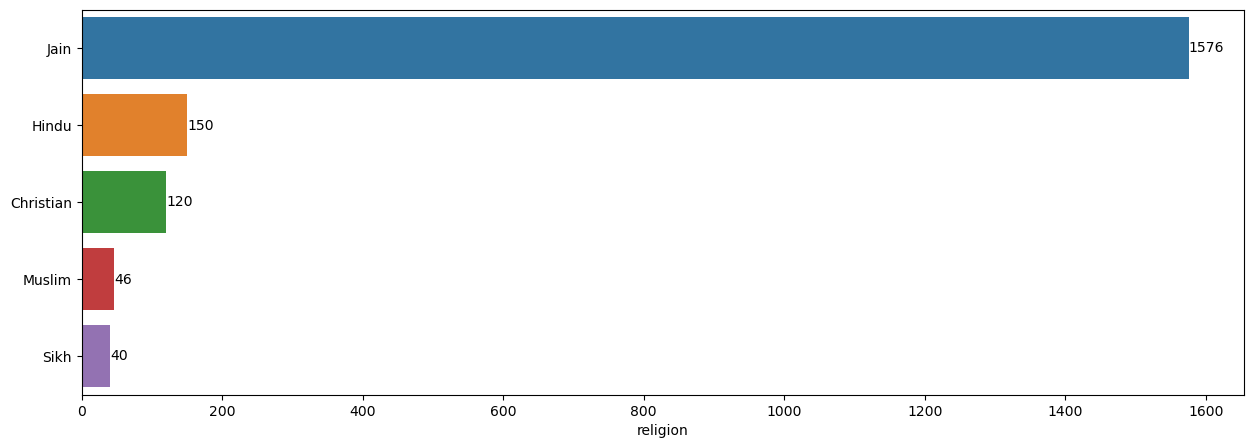

In [272]:
print('The variety of Religion')
plt.figure(figsize=(15,5))
ax= sns.barplot(x=df['religion'].value_counts(),y=df['religion'].unique(),errwidth=0)
for i in ax.containers:
    ax.bar_label(i,)

The variety of mother_tongue


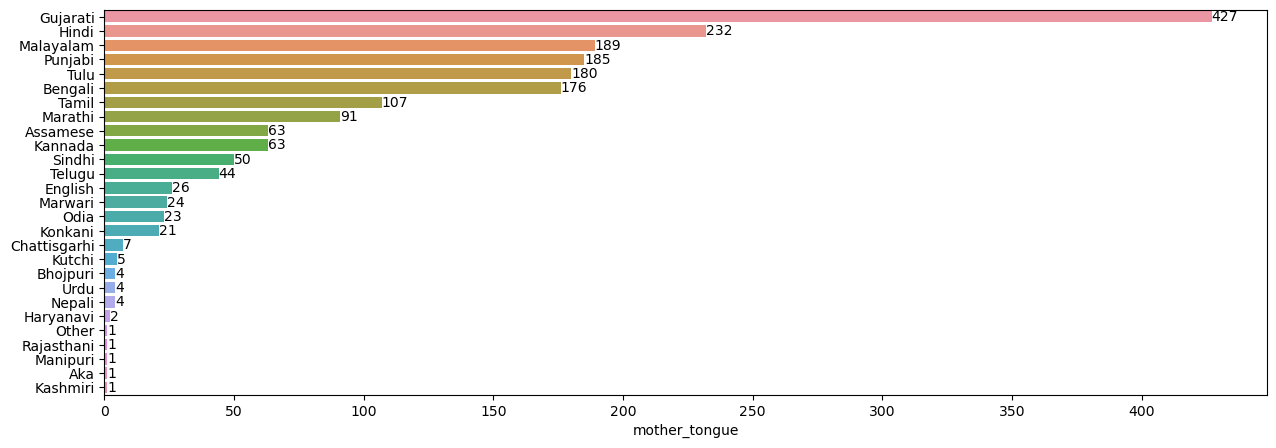

In [273]:
print('The variety of mother_tongue')
plt.figure(figsize=(15,5))
ax= sns.barplot(x=df['mother_tongue'].value_counts(),y=df['mother_tongue'].unique(),errwidth=0)
for i in ax.containers:
    ax.bar_label(i,)

The variety of profession


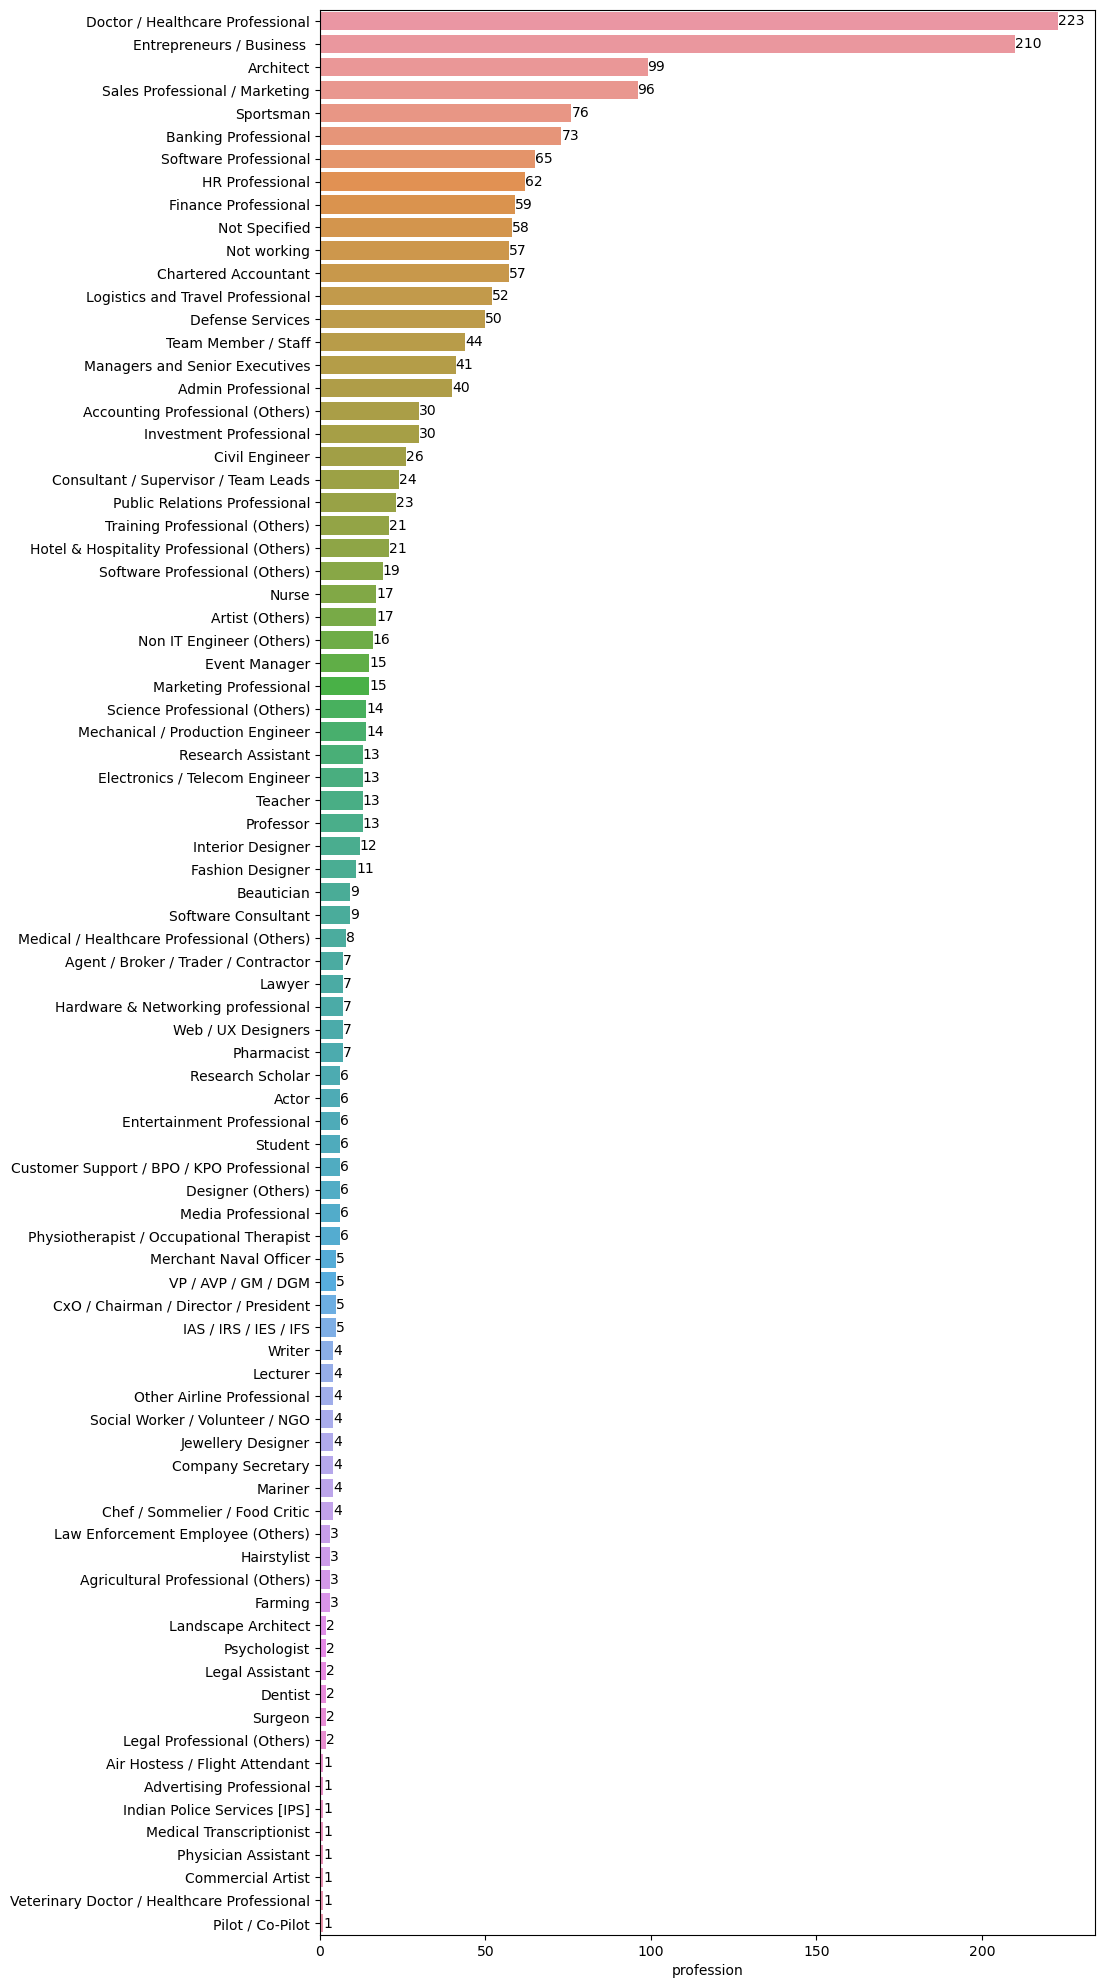

In [274]:
print('The variety of profession')
plt.figure(figsize=(10,25))
ax= sns.barplot(x=df['profession'].value_counts(),y=df['profession'].unique(),errwidth=0)
for i in ax.containers:
    ax.bar_label(i,)

The variety of caste and religion country wise


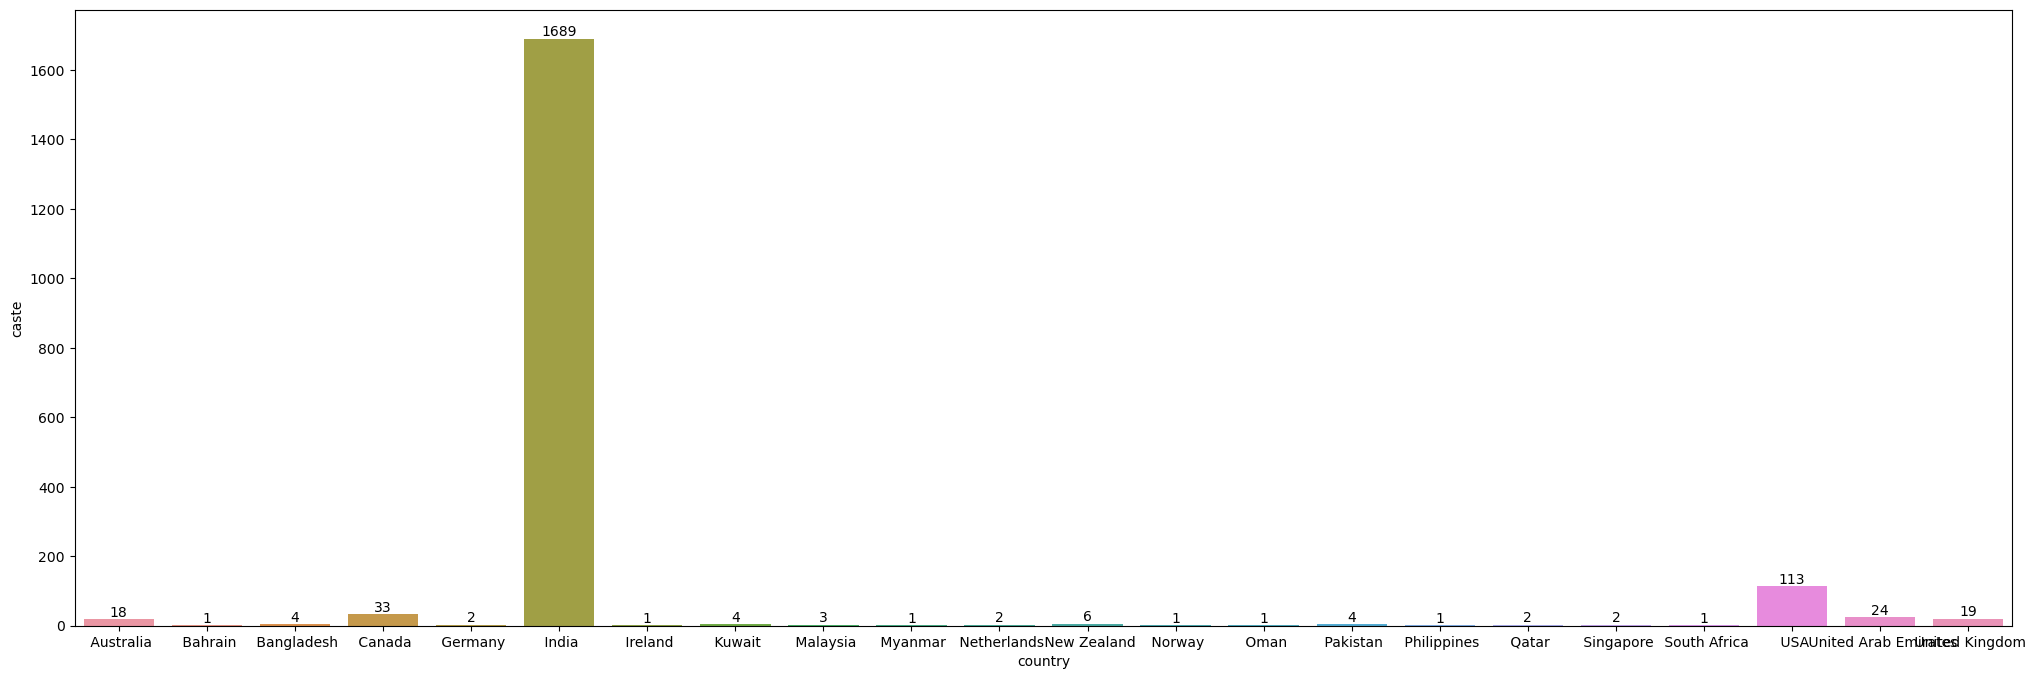

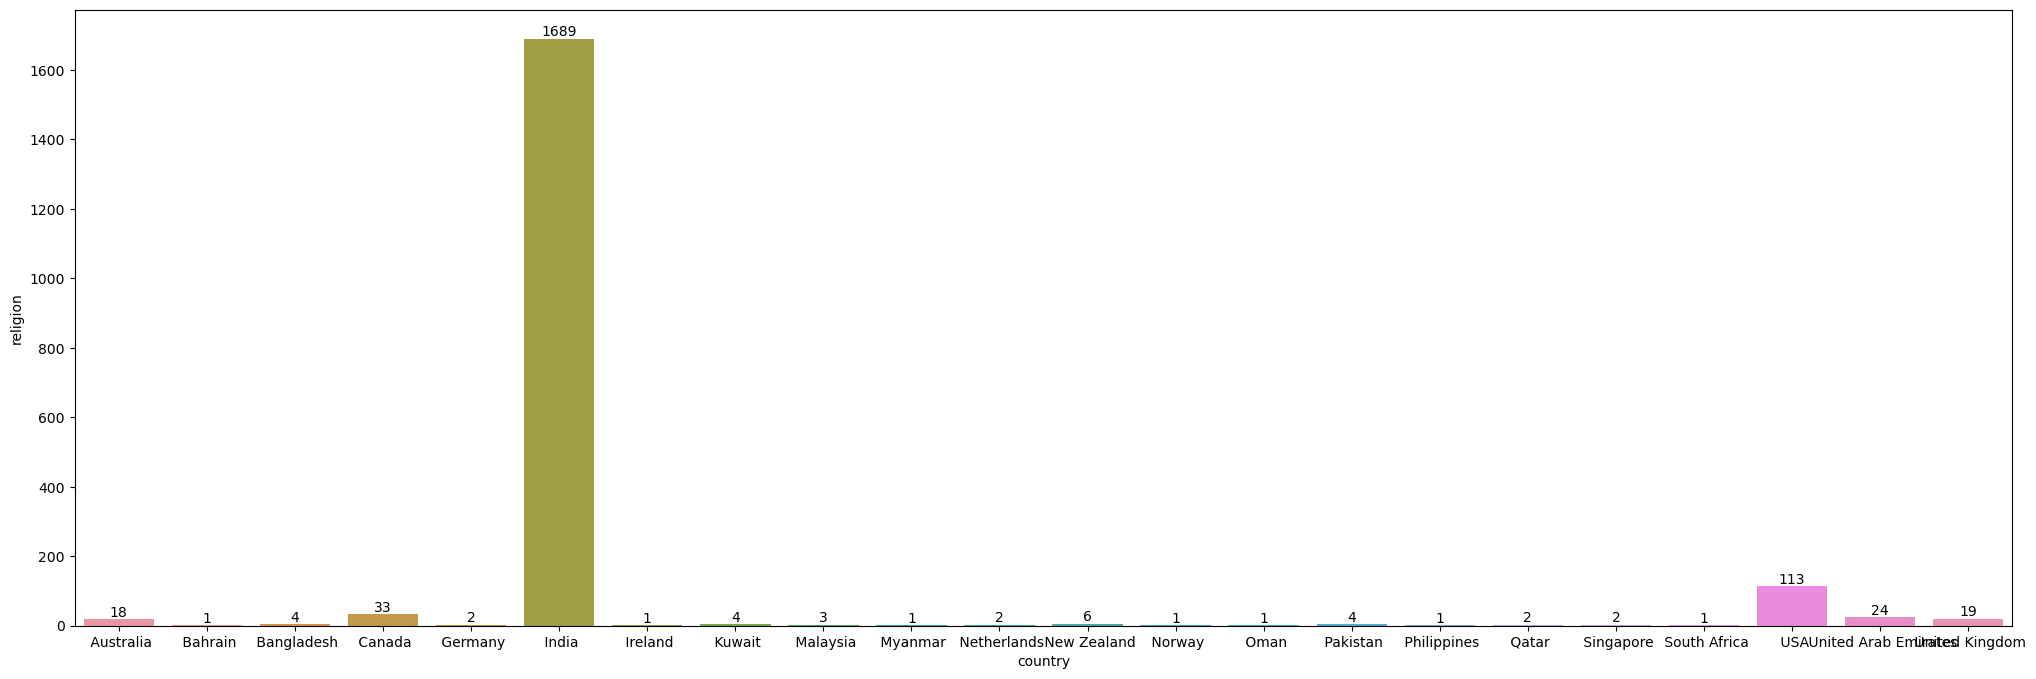

In [275]:
print('The variety of caste and religion country wise')
plt.figure(figsize=(25,8))
df_cnt_rel_caste = df[['caste','religion','country']].groupby('country').count()
df_cnt_rel_caste = df_cnt_rel_caste.reset_index()
ax= sns.barplot(data = df_cnt_rel_caste,x='country',y='caste')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()
plt.figure(figsize=(25,8))
ax= sns.barplot(data = df_cnt_rel_caste,x='country',y='religion')
for i in ax.containers:
    ax.bar_label(i,)

Heat map


<AxesSubplot:>

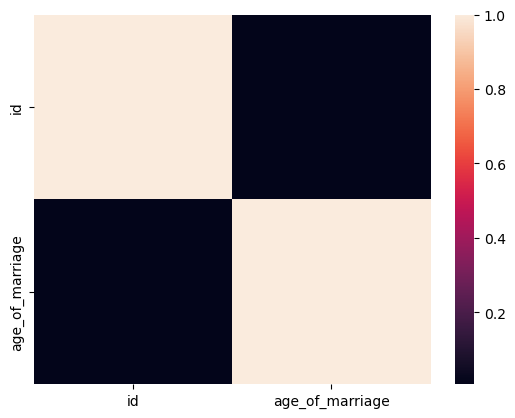

In [276]:
print( 'Heat map')
sns.heatmap(df.corr())

### Preprocessing and Analyzing

**'height'** coulmn shouldn't be an column with object dtype.

In [277]:
height_ft = []
height_in = []

for i in range(df.shape[0]):
    height_ft.append(int(df['height'][i].split("'")[0]))
    height_in.append(int(list(df['height'][i].split("'")[1])[0]))

df['height_ft'] = height_ft
df['height_in'] = height_in

In [278]:
df=df.drop(['height','profession','location'], axis=1)

We have many column with object datatype. Let's apply encoding to those.

In [279]:
#le = LabelEncoder()
#df['gender'] = le.fit_transform(df.gender)

In [280]:
df_encoded = pd.get_dummies(df,drop_first=True)

### Data for Model Training

In [281]:
print('Checking if any catagorical column or null values present')
print(df_encoded.dtypes)
print(df_encoded.isnull().sum())

Checking if any catagorical column or null values present
id                                 int64
age_of_marriage                  float64
height_ft                          int64
height_in                          int64
gender_male                        uint8
                                  ...   
country_ Singapore                 uint8
country_ South Africa              uint8
country_ USA                       uint8
country_ United Arab Emirates      uint8
country_ United Kingdom            uint8
Length: 96, dtype: object
id                               0
age_of_marriage                  0
height_ft                        0
height_in                        0
gender_male                      0
                                ..
country_ Singapore               0
country_ South Africa            0
country_ USA                     0
country_ United Arab Emirates    0
country_ United Kingdom          0
Length: 96, dtype: int64


In [282]:
X = df_encoded.drop('age_of_marriage', axis = True)
y = df_encoded['age_of_marriage']

In [283]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('Training Set :',X_train.shape, y_train.shape,'\n','Test set :',X_test.shape, y_test.shape)

Training Set : (1449, 95) (1449,) 
 Test set : (483, 95) (483,)


### Training Model and Best Model

In [312]:
Best_Model = {}
models=[]
models.append(('lr',LinearRegression()))
models.append(('DT',DecisionTreeRegressor()))
models.append(('RF',RandomForestRegressor(n_estimators=200)))
models.append(('ET',ExtraTreesRegressor(n_estimators=120)))


for name,model in models:
    kfold=KFold(n_splits=10)
    crossvalscore=cross_val_score(model,X_train,y_train,scoring='r2',cv=kfold)
    Best_Model[model]=crossvalscore.mean()
    print('{}:model {}:R2 score - {}:standard_deviation {}'.format(name,model,crossvalscore.mean(),crossvalscore.std()))

Bestmodel_accuracy=max(Best_Model.values())
Bestmodel_Name=max(Best_Model,key=Best_Model.get)

print('\n',"Best model : ",Bestmodel_Name," ,'\n', r2 score  : ",Bestmodel_accuracy)

lr:model LinearRegression():R2 score - 0.10133937276175538:standard_deviation 0.05245629754615733
DT:model DecisionTreeRegressor():R2 score - 0.4492853400887439:standard_deviation 0.10659973344079483
RF:model RandomForestRegressor(n_estimators=200):R2 score - 0.6570362972325741:standard_deviation 0.04992848210508237
ET:model ExtraTreesRegressor(n_estimators=120):R2 score - 0.5483062855117058:standard_deviation 0.050071133161088154

 Best model is  RandomForestRegressor(n_estimators=200)  and accuracy is :  0.6570362972325741


In [313]:
model = RandomForestRegressor(n_estimators=200)
model = model.fit(X_train,y_train)

# Saving the Model

In [316]:
pickle.dump(model, open('model.pkl','wb'))

<h1><center> Thank You !! </center></h1>